In [228]:
print('Hello World')
print("I'm Aditya Raj")
print('This is Data Science Project For Simplilearn')

Hello World
I'm Aditya Raj
This is Data Science Project For Simplilearn


# Retail Analysis with Walmart Data
## Course-end Project 1
### Description

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

#### Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

    Store - the store number

    Date - the week of sales

    Weekly_Sales -  sales for the given store

    Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

    Temperature - Temperature on the day of sale

    Fuel_Price - Cost of fuel in the region

    CPI – Prevailing consumer price index

    Unemployment - Prevailing unemployment rate

#### Holiday Events

    Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
    Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
    Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
    Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

## Analysis Tasks

#### Basic Statistics tasks

    Which store has maximum sales #### DONE

    Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation   #### DONE

    Which store/s has good quarterly growth rate in Q3’2012   #### DONE

    Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

    Provide a monthly and semester view of sales in units and give insights   #### DONE

#### Statistical Model

    For Store 1 – Build  prediction models to forecast demand

    Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

    Change dates into days by creating new variable.

    Select the model which gives best accuracy.


#### Imports

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime


In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor 

In [231]:
sns.color_palette('plasma')
from warnings import filterwarnings
filterwarnings('ignore')

# Data Prep and Data Cleaning

#### Loading the Walmart Sales CSV file into walmart_sales and copying the data into another dataframe ws

In [232]:
walmart_sales = pd.read_csv('Walmart_Store_sales.csv')
ws = walmart_sales.copy(deep = 1)
ws.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


##### Description

In [233]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [234]:
ws.describe().astype(int)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435,6435,6435,6435,6435,6435,6435
mean,23,1046964,0,60,3,171,7
std,12,564366,0,18,0,39,1
min,1,209986,0,-2,2,126,3
25%,12,553350,0,47,2,131,6
50%,23,960746,0,62,3,182,7
75%,34,1420158,0,74,3,212,8
max,45,3818686,1,100,4,227,14


##### Checking for Null Values in the DataFrame

In [235]:
ws.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### Checking for duplicates

In [236]:
ws.duplicated().sum()

0

#### Lowering the case of the Column Values

In [237]:
ws.columns = ws.columns.str.lower()

In [238]:
ws.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [239]:
feature_list = list(ws.columns.drop(['date','store','holiday_flag']))
le =feature_list.__len__()
le

5

### Checking Outliers

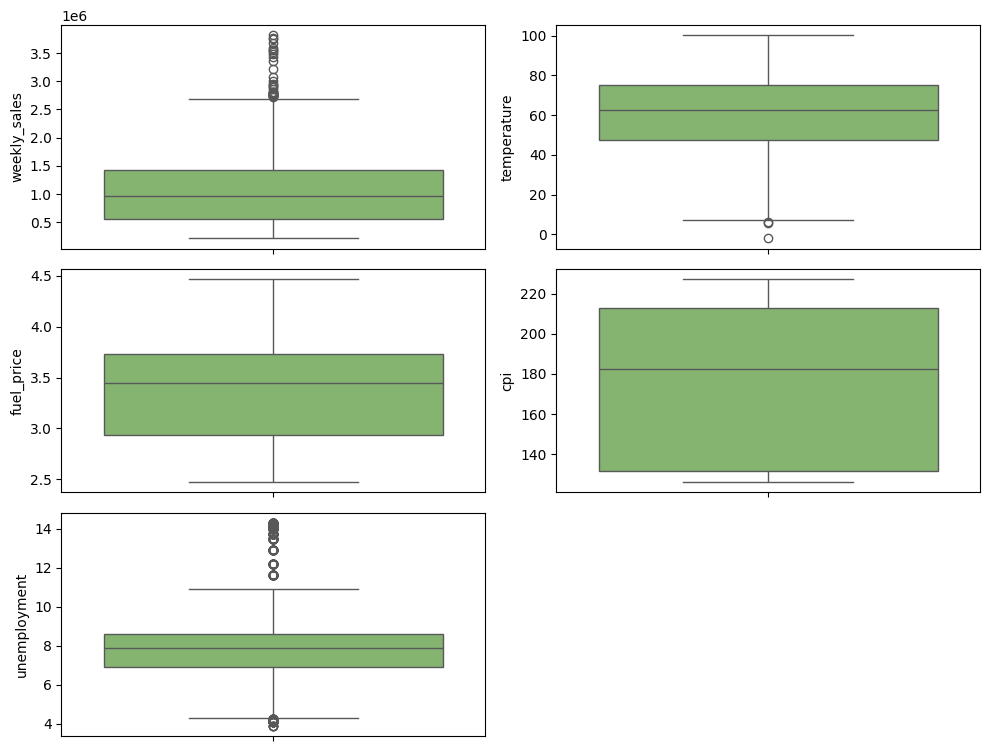

In [240]:
plt.figure(figsize = (10, 10))
count = 1
for feature in feature_list:
    plt.subplot(4,2,count)
    sns.boxplot(data = ws[feature], palette = 'summer')
    count += 1
plt.tight_layout()
plt.show()

<Axes: xlabel='cpi', ylabel='Count'>

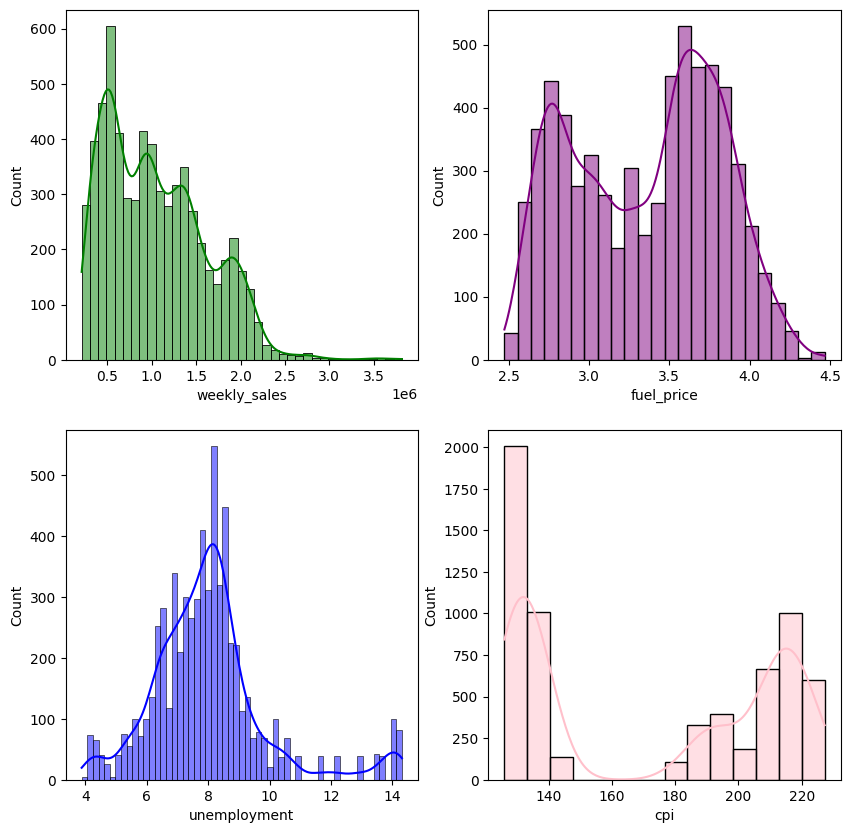

In [241]:
fig, axes = plt.subplots(nrows= 2,
                         ncols= 2,
                         figsize = (10, 10))

sns.histplot(data = ws,
            x = 'weekly_sales',
            kde = True,
            color = 'green',
            ax =  axes[0, 0])

sns.histplot(data = ws,
            x = 'fuel_price',
            kde = True,
            color = 'purple',
            ax =  axes[0, 1])

sns.histplot(data = ws,
            x = 'unemployment',
            kde = True,
            color = 'blue',
            ax =  axes[1, 0])

sns.histplot(data = ws,
            x = 'cpi',
            kde = True,
            color = 'pink',
            ax =  axes[1, 1])

* As observed, Weekly Sales and Unemployment have longer tails near the end, which suggests the existence of outliers in them

In [242]:
# Convert Date column to datetime object
ws['date'] = pd.to_datetime(ws['date'], format="%d-%m-%Y")
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [243]:
# Extract the year and month
ws['year'] = pd.DatetimeIndex(ws['date']).year
ws['month'] = pd.DatetimeIndex(ws['date']).month
ws.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


## Data Visualisation

### Q1. Plotting the graph for Visualizing the total sales of the stores

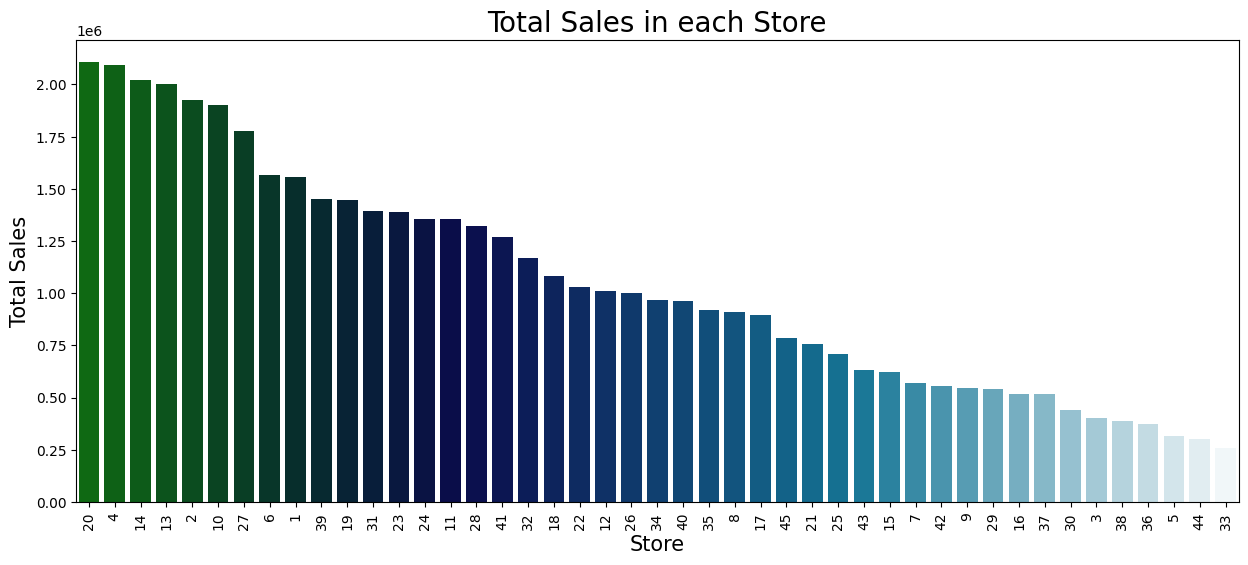

In [244]:
# Making the variable 'gb_store_sum' which stores the list of the sum of the sales for the duration of each Store
gb_store_sum = ws.groupby('store')['weekly_sales'].sum().sort_values(ascending=0)

# Plotting graph
plt.figure(figsize = (15, 6))
sns.barplot(data = ws,
            x = 'store',
            y = 'weekly_sales',
            order = gb_store_sum.index,
            errorbar=('ci', False),
            palette='ocean')


# Add labels and title
plt.title('Total Sales in each Store', size = 20)
plt.xlabel('Store', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.xticks(rotation=90)

plt.show()

### Q2. Ploting graph for the Deviation in Sales of each Store and then finding the Coefficient of the Deviation

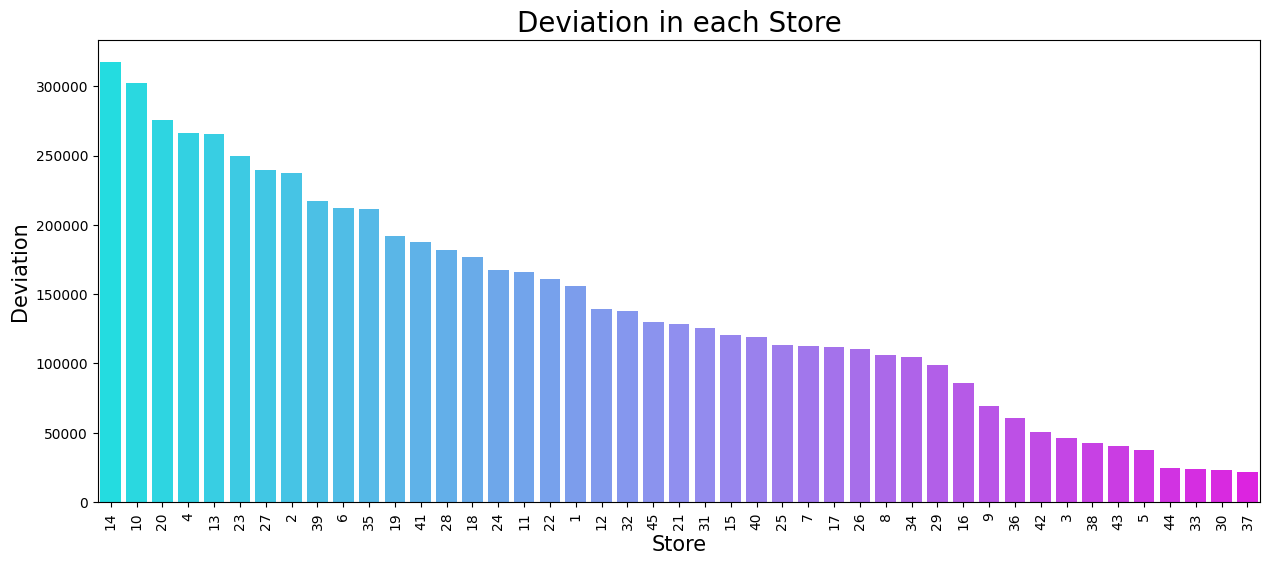

In [245]:
# Plotting graph fo rStandard Deviation
Deviation = pd.DataFrame(ws.groupby('store')['weekly_sales'].std())
plt.figure(figsize = (15, 6))
sns.barplot(data = Deviation,
            x = 'store',
            y = 'weekly_sales',
            order=Deviation.weekly_sales.sort_values(ascending=0).index,
            palette= 'cool')

# Add labels and title
plt.title('Deviation in each Store', size = 20)
plt.xlabel('Store', size = 15)
plt.ylabel('Deviation', size = 15)
plt.xticks(rotation=90)

plt.show()

In [246]:
# Coefficient of std
cv = np.std(ws['weekly_sales'], ddof=1) / np.mean(ws['weekly_sales']) * 100
print (f'>>> Coefficient of the Standard Deviation of the Weekly Sales is {cv:.2f}')

>>> Coefficient of the Standard Deviation of the Weekly Sales is 53.91


### Q3. Sales in 3rd Quarter of Year 2012

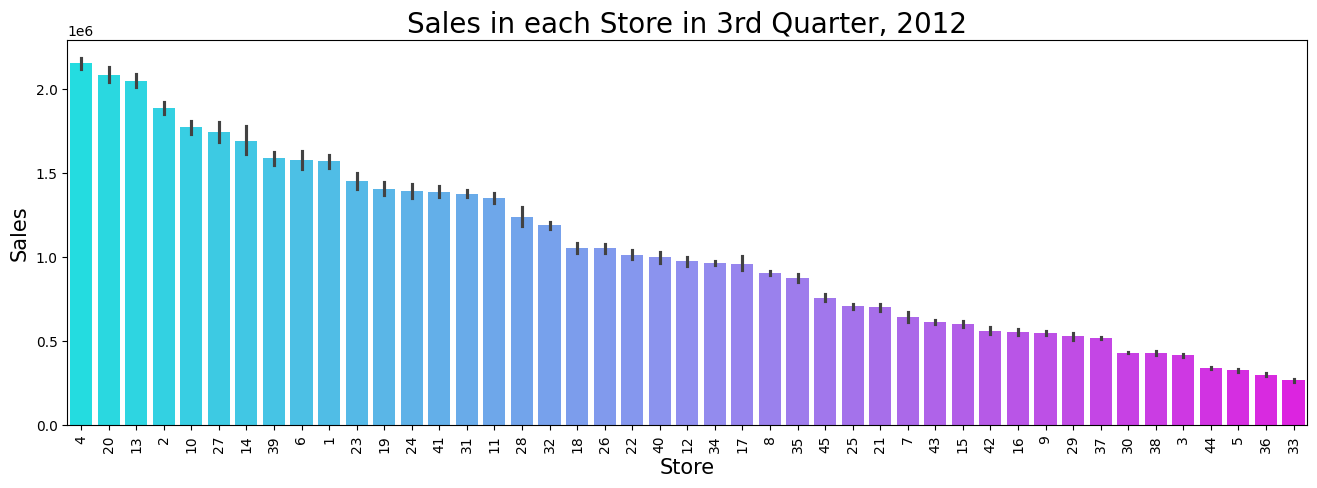

In [247]:
# 3rd Quarter Sales Report
plt.figure(figsize=(16, 5))
ws_q3_2012 = ws[(ws['month'].isin([6,7,8,9])) & (ws['year'] == 2012)] 
fig = sns.barplot(data = ws_q3_2012,
            x = 'store',
            y = 'weekly_sales',
            order = ws_q3_2012.groupby('store')['weekly_sales'].sum().sort_values(ascending = 0).index,
            palette = 'cool')

# Add labels and title
plt.title('Sales in each Store in 3rd Quarter, 2012', size = 20)
plt.xlabel('Store', size = 15)
plt.ylabel('Sales', size = 15)
plt.xticks(rotation=90)

plt.show()

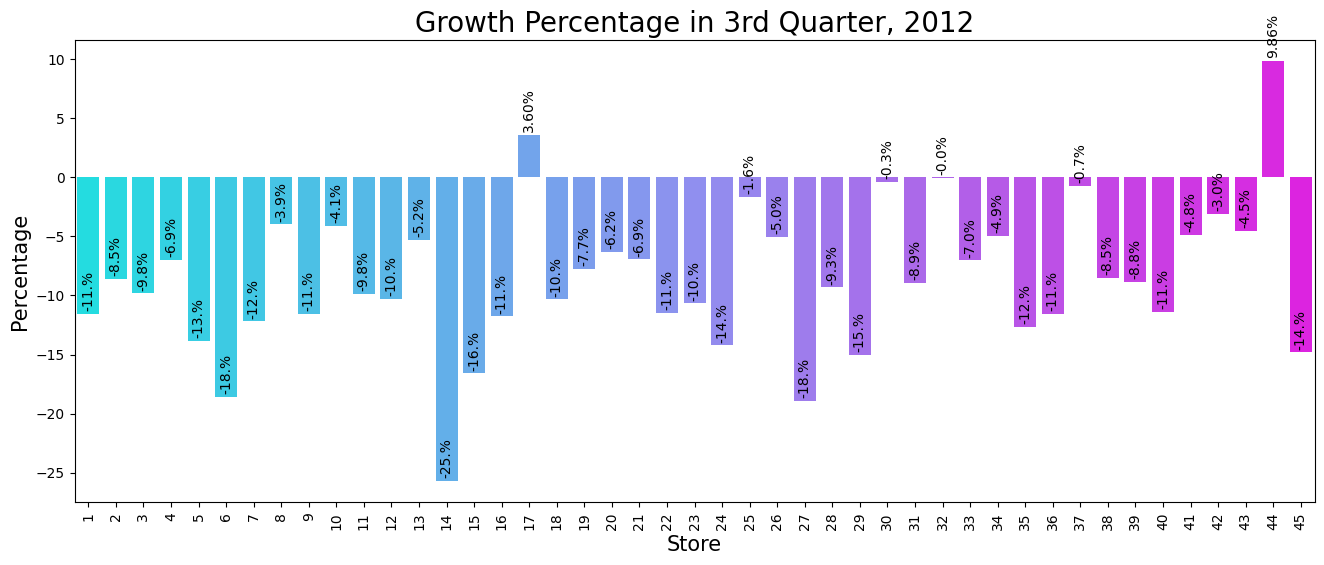

In [248]:
# 3rd Quarter Sales Report
gr_ws = ws_q3_2012[(ws_q3_2012['date'] == '2012-06-01') | (ws_q3_2012['date'] == '2012-09-28')]
pct_ws = gr_ws.groupby('store')['weekly_sales'].pct_change().dropna().reset_index().rename(columns={'index':'store',
                                                                                                    'weekly_sales':'%change'}) * 100
pct_ws['store'] = gr_ws['store'].unique()

# Graph
plt.figure(figsize=(16, 6))

fig = sns.barplot(data = pct_ws,
            x = 'store',
            y = '%change',
            palette = 'cool')

# Add annotations above the bars
for i, bar in enumerate(fig.patches):
    plt.annotate(str(bar.get_height())[0:4] + '%',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5),
                 ha='center',
                 va='baseline',
                 rotation = 90)

# Add labels and title
plt.title('Growth Percentage in 3rd Quarter, 2012', size = 20)
plt.xlabel('Store', size = 15)
plt.ylabel('Percentage', size = 15,)
plt.xticks(rotation=90)

plt.show()

* We can see that shop 44 had best growth of about 10%
* The shop 14 had a performance drop of aprrox 26 %
* From graph we can infer that all the shops except shop 17 and 44, have a dip in performance in the last week as compared to first week


### Q4. Analysisng Sales on Holidays

<Axes: >

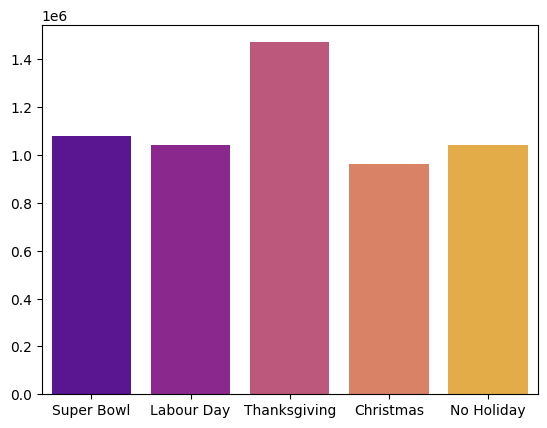

In [249]:
# Assigning Holiday Name to Each presented date to make it easier for the comparison 

super_bowl = ws[ws['date'].isin(['2010-02-12','2011-02-11','2012-02-10'])]
labour_day = ws[ws['date'].isin(['2010-09-10','2011-09-09','2012-09-07'])]
thanksgiving = ws[ws['date'].isin(['2010-11-26','2011-11-25','2012-11-23'])]
christmas = ws[ws['date'].isin(['2010-12-31','2011-12-30','2012-12-28'])]
no_holiday = ws[ws['holiday_flag'] == 0]

y = [super_bowl['weekly_sales'].mean(),
    labour_day['weekly_sales'].mean(),
    thanksgiving['weekly_sales'].mean(),
    christmas['weekly_sales'].mean(),
    no_holiday['weekly_sales'].mean()]

x = ['Super Bowl',
    'Labour Day',
    'Thanksgiving',
    'Christmas',
    'No Holiday']


sns.barplot(x = x,
       y = y,
       palette='plasma')



**_ThanksGiving_ has highest sales while _Christmas_ has lower sales than average daily sales**

## Monthly and Semester wise and Yearly Sales Analysis

#### Monthly Sales

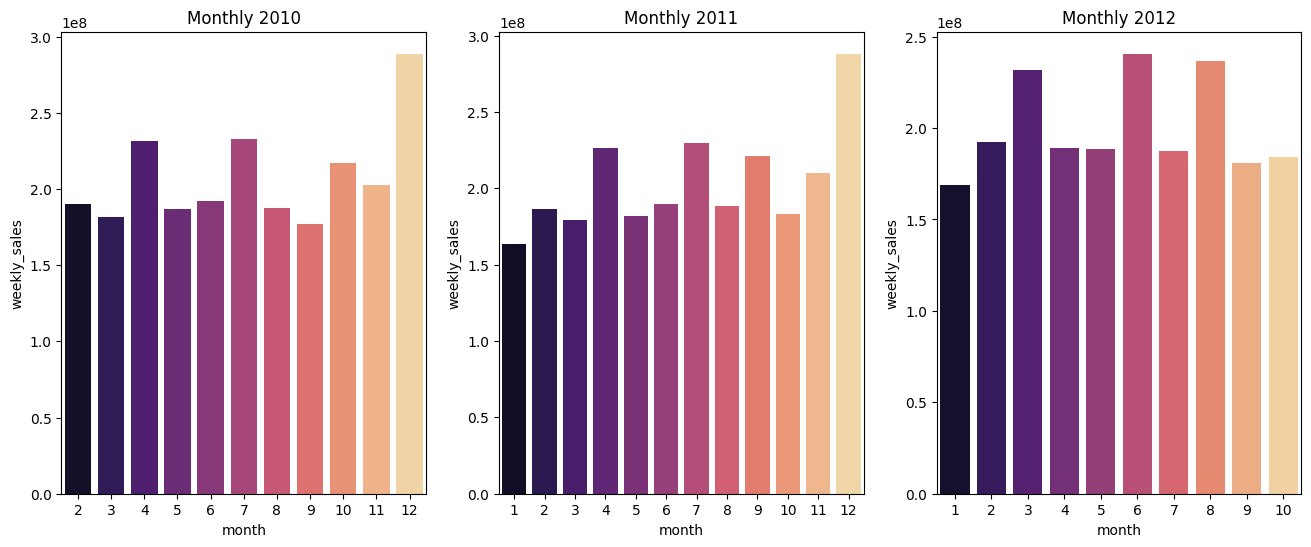

In [250]:
# Montly Report
mr_ws_2010 = ws[(ws['year'] == 2010)  | (ws['year'] == 2010)].groupby('month')['weekly_sales'].sum()
mr_ws_2011 = ws[(ws['year'] == 2011)  | (ws['year'] == 2011)].groupby('month')['weekly_sales'].sum()
mr_ws_2012 = ws[(ws['year'] == 2012)  | (ws['year'] == 2012)].groupby('month')['weekly_sales'].sum()

# Creating the subplot space
fig, axes = plt.subplots(nrows= 1,
                         ncols= 3,
                         figsize = (16, 6))

# Plotting the graphs using seaborn
sns.barplot(data = mr_ws_2010,
            ax = axes[0],
            palette='magma')

sns.barplot(data = mr_ws_2011,
            ax = axes[1],
            palette='magma')

sns.barplot(data = mr_ws_2012,
            ax = axes[2],
            palette='magma')

# Setting Titles for the graphs
axes[0].title.set_text("Monthly 2010")
axes[1].title.set_text("Monthly 2011")
axes[2].title.set_text("Monthly 2012")


#### Semesterly Sales

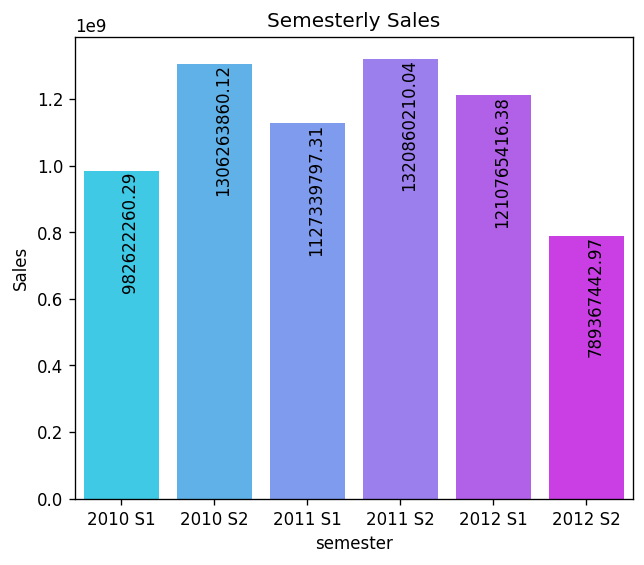

In [251]:
ws['semester'] = ws.date.dt.year.astype(str) + ' S'+ np.where(ws.date.dt.quarter.gt(2),2,1).astype(str)
# By year Sales
plt.figure(figsize=(6, 5),
           dpi=120)
ax = sns.barplot(data = ws.drop('date',
                           axis = 1).groupby('semester').sum().reset_index(),
            x = 'semester',
            y = 'weekly_sales',
            palette = 'cool')

# Add annotations above the bars
for i, bar in enumerate(ax.patches):
    plt.annotate(str(bar.get_height()),
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5),
                 ha='left',
                 va='top',
                 rotation = 90)
    
plt.title("Semesterly Sales")
plt.ylabel("Sales")

plt.show()

#### Year wise Sales

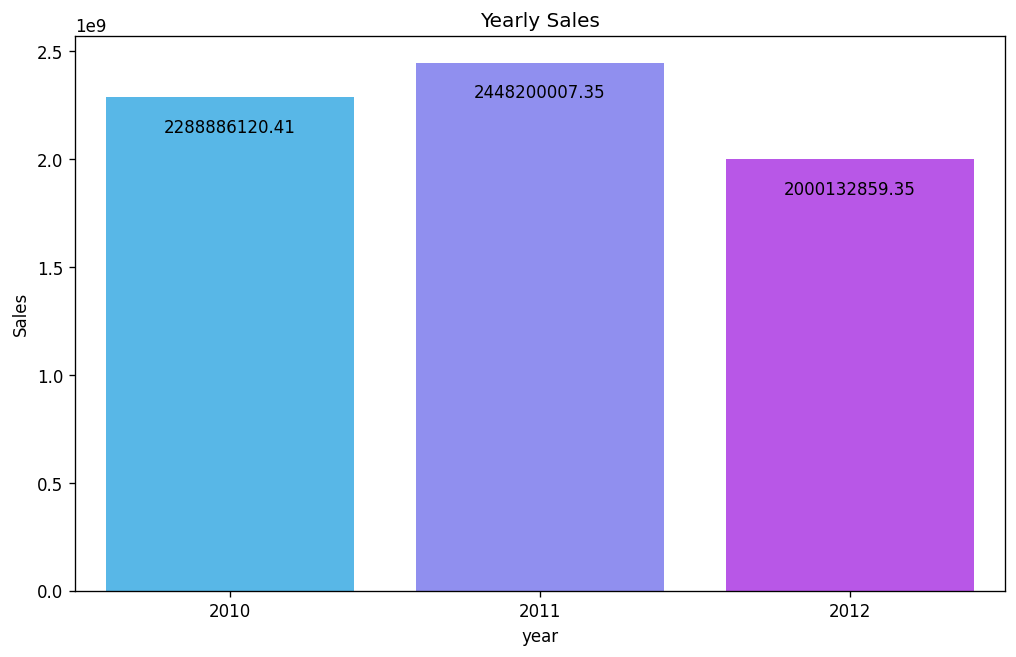

In [252]:
# By year Sales
plt.figure(figsize=(10, 6),
           dpi=120)
fig = sns.barplot(data = ws.drop('date',
                           axis = 1).groupby('year').sum().reset_index(),
            x = 'year',
            y = 'weekly_sales',
            palette = 'cool')

# Add annotations above the bars
for i, bar in enumerate(fig.patches):
    plt.annotate('\n'+str(bar.get_height()),
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5),
                 ha='center',
                 va='top')

plt.title("Yearly Sales")
plt.ylabel("Sales")
plt.show()


In [253]:
# Model

# Statistical Model

 * For Store 1 – Build  prediction models to forecast demand

 * Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

 * Change dates into days by creating new variable.
 
 * Select the model which gives best accuracy.


In [254]:
# getting the dataframe for Store 1
ws_s1 = ws[ws['store'] == 1]

# Dropping unneccessary columns
ws_s1 = ws_s1.drop(['store', 'date', 'semester'], axis = 1)

# Changing the type to float
ws_s1 = ws_s1.astype(float)
ws_s1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekly_sales  143 non-null    float64
 1   holiday_flag  143 non-null    float64
 2   temperature   143 non-null    float64
 3   fuel_price    143 non-null    float64
 4   cpi           143 non-null    float64
 5   unemployment  143 non-null    float64
 6   year          143 non-null    float64
 7   month         143 non-null    float64
dtypes: float64(8)
memory usage: 10.1 KB


In [255]:
ws_s1.head()

,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month
0,1643690.90,0.0,42.31,2.572,211.096358,8.106,2010.0,2.0
1,1641957.44,1.0,38.51,2.548,211.242170,8.106,2010.0,2.0
2,1611968.17,0.0,39.93,2.514,211.289143,8.106,2010.0,2.0
3,1409727.59,0.0,46.63,2.561,211.319643,8.106,2010.0,2.0
4,1554806.68,0.0,46.50,2.625,211.350143,8.106,2010.0,3.0


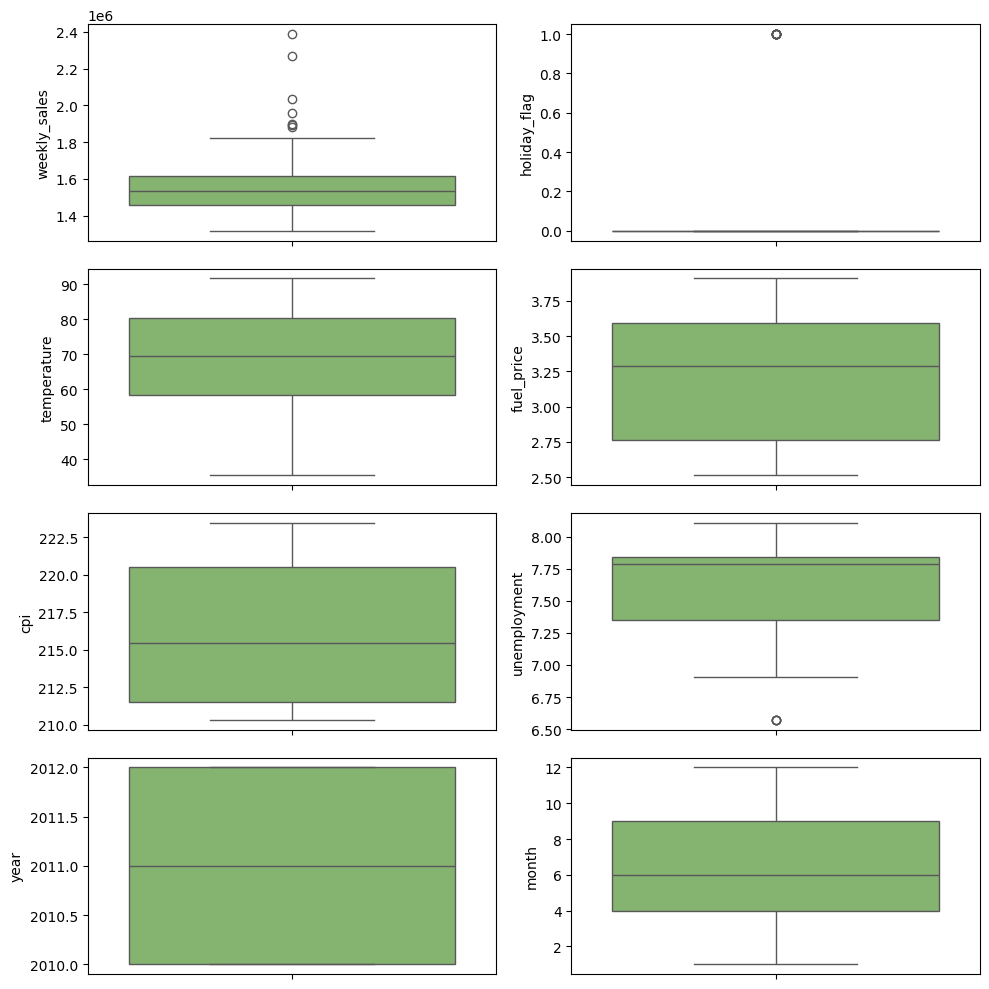

In [256]:
features_list = ws_s1.columns
plt.figure(figsize = (10, 10))
count = 1
for feature in features_list:
    plt.subplot(4,2,count)
    sns.boxplot(data = ws_s1[feature],
                palette = 'summer')
    count += 1
plt.tight_layout()
plt.show()

* As observes from the boxplots, the independent variables have no outliers but the dependent variable 'wwkly_sales' many outliers

<Axes: >

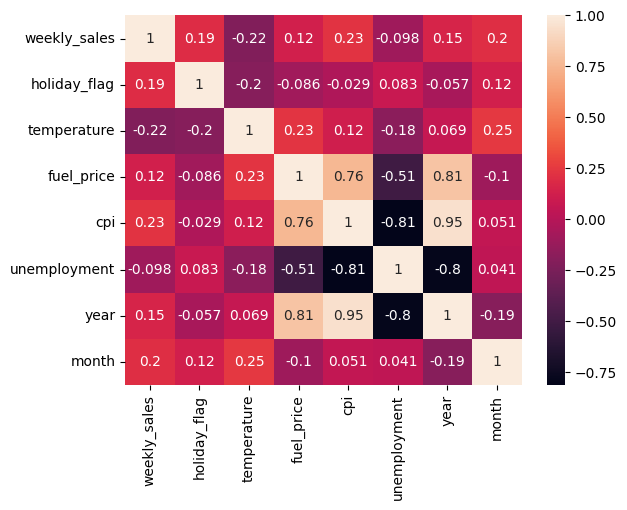

In [257]:
sns.heatmap(ws_s1.select_dtypes('number').corr(),
            annot=True)

In [258]:
X = ws_s1.drop(labels='weekly_sales',
                   axis = 1)
y = ws_s1['weekly_sales']

## Training Model

In [259]:
ws.columns
feature = ws.columns.drop(['weekly_sales', 'date', 'semester'])
sales = 'weekly_sales'
feature, sales

(Index(['store', 'holiday_flag', 'temperature', 'fuel_price', 'cpi',
        'unemployment', 'year', 'month'],
       dtype='object'),
 'weekly_sales')

#### Splitting model using TEST_TRAIN_SPLIT

In [260]:


X = ws[feature]
y = ws[sales]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state= 42)

#### Linear Regression Model

In [261]:
model = LinearRegression()
model.fit(X = X_train,
          y = y_train)

LinearRegression()

In [262]:
lin_pred = model.predict(X = X_test)

In [263]:
lin_score = r2_score(y_true = y_test,
                 y_pred = lin_pred)
print(f'>>> R2_Score : {lin_score}')

>>> R2_Score : 0.15667315497435974


#### Decision Tree Regressor

In [264]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

tree_pred = tree_reg.predict(X_test)
tree_score = r2_score(y_true = y_test,
                 y_pred = tree_pred)
print(f'>>> R2_Score : {tree_score}')


>>> R2_Score : 0.8996581671031009


#### Random Forest Regressor

In [265]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

rf_pred = rf_reg.predict(X_test)
rf_score = r2_score(y_true = y_test,
                 y_pred = rf_pred)
print(f'>>> R2_Score : {rf_score}')


>>> R2_Score : 0.9367476864417852


### GridCV

In [266]:
# Fine-Tune model using GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 45, 60], 'max_features': [2,4,6,8]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 45, 60]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [267]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 60}

In [268]:
grid_pred = grid_search.predict(X_test)
grid_score = r2_score(y_true = y_test,
                 y_pred = grid_pred)
print(f'>>> R2_Score : {grid_score}')

>>> R2_Score : 0.9365432613512245


### XGBoost Regressor

In [269]:
xgb_r = XGBRegressor(objective = 'reg:squarederror',
    n_estimator = 5, seed = 42)
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=5, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [270]:
xg_pred = xgb_r.predict(X_test)

In [271]:
xg_score = r2_score(y_true = y_test,
                 y_pred = xg_pred)
print(f'>>> R2_Score : {xg_score}')

>>> R2_Score : 0.9594195022515221


In [272]:
d = pd.DataFrame()
d['y_test'] = y_test
d['y_pred'] = xg_pred
d['mp'] = abs((d['y_test'] - d['y_pred']) / d['y_test'])
(d.mp.mean())*100

6.1985781378904585

In [273]:
print(f'''
>>> Linear Regression        : {lin_score * 100:.2f} %
>>> Decision Tree Regression : {tree_score * 100:.2f} %
>>> Random Forest Regression : {rf_score * 100:.2f} %
>>> Gid Search CV            : {grid_score * 100:.2f} %
>>> XGB Regressor            : {xg_score * 100:.2f} %
''')


Linear Regression        : 15.67 %
Decision Tree Regression : 89.97 %
Random Forest Regression : 93.67 %
Gid Search CV            : 93.65 %
XGB Regressor            : 95.94 %



**As seen the XGBoost Regressor works the best with 96% accuracy**

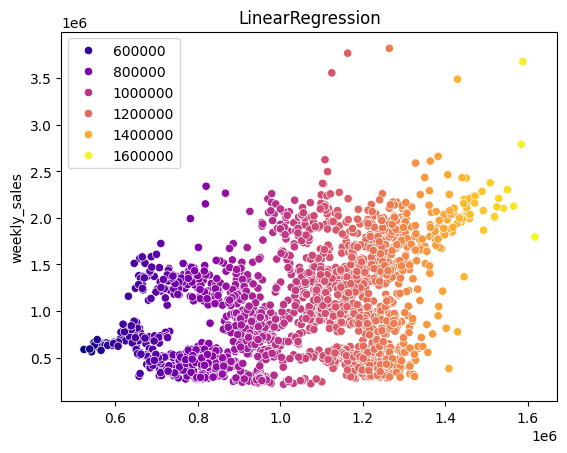

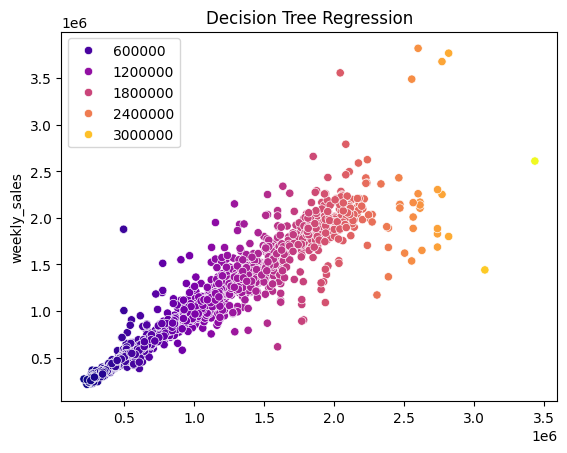

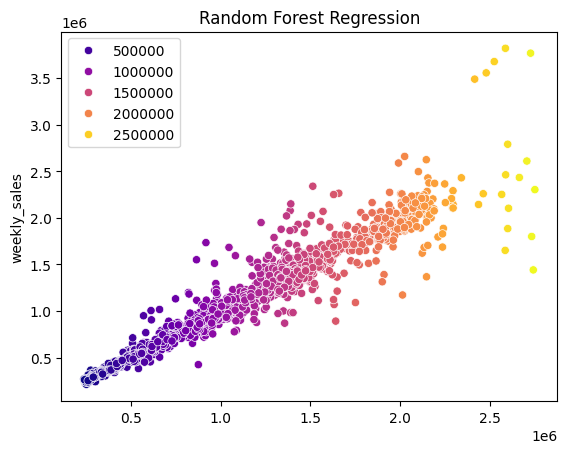

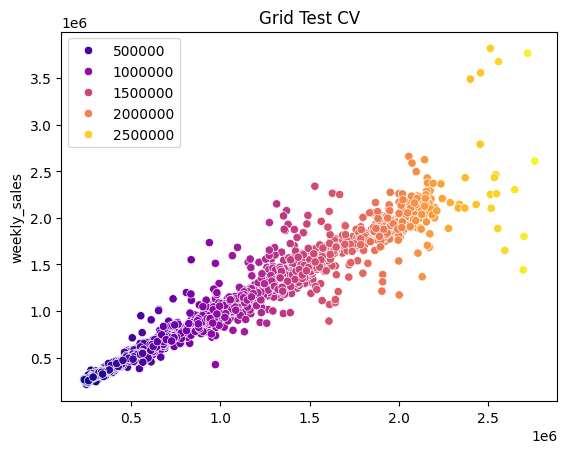

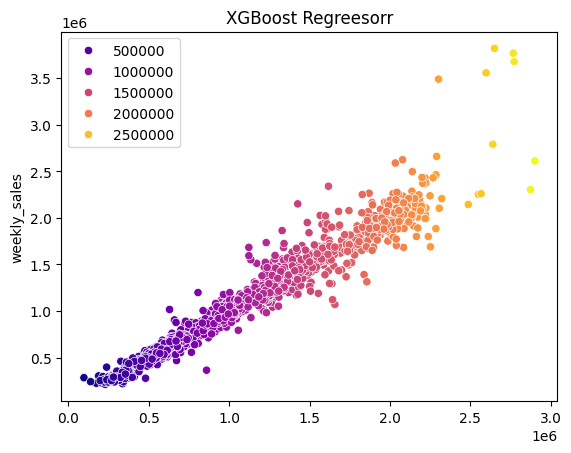

In [274]:
predictions = {'LinearRegression' : lin_pred,
               'Decision Tree Regression' : tree_pred,
               'Random Forest Regression' : rf_pred, 
               'Grid Test CV' : grid_pred,
               'XGBoost Regreesorr' : xg_pred}
for key in predictions:
    sns.scatterplot(x= predictions[key],
                     y = y_test,
                     hue = predictions[key],
                     palette='plasma')
    plt.title(key)
    plt.show()